<div class="alert alert-block alert-warning" style="font-size: 24px;">
    <b>Project: Statistical analysis of the scooter rental service GoFast</b>


Table of contents

- [Chapter 1. Loading Data](#Step-1.-Loading-Data)
- [Chapter 2. Preprocessing Data](#Step-2.-Preprocessing-Data)
- [Chapter 3. Exploratory Data Analysis](#Step-3.-Exploratory-Data-Analysis) 
- [Chapter 4. Combining Data](#Step-4.-Combining-Data)
- [Chapter 5. Revenue Calculation](#Step-5.-Revenue-Calculation)
- [Chapter 6. Hypothesis Testing](#Step-6.-Hypothesis-Testing)
</div>

**Project Description:**

Analyze the data he popular scooter rental service **GoFast** and test some hypotheses that can help the business grow.  
To travel around the city, GoFast users use a mobile application. The service can be used:
- without a subscription
- no subscription fee;
- the cost of one minute of travel is 8 rubles;
- the cost of the start (beginning of the trip) is 50 rubles;
- with an Ultra subscription
- the subscription fee is 199 rubles per month;
- the cost of one minute of travel is 6 rubles;
- the cost of the start is free.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats as st
from scipy.stats import binom

#### Chapter 1. Loading Data

In [5]:
#Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.
users_go = pd.read_csv('/datasets/users_go.csv')
riders_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [6]:
# Изучаем общую информацию о каждом датафрейме.

In [7]:
users_go.info()
riders_go.info()
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

In [8]:
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [9]:
riders_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [10]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Output:**

**users_go** - 1565 entries, no gaps, 31 obvious duplicates.

**riders_go** - 18068 entries, no gaps, no obvious duplicates.

**subscriptions_go** - 2 entries, no gaps, no obvious duplicates.

#### Chapter 2. Preprocessing Data

2.1 We will find duplicates and remove them

In [11]:
users_go.duplicated().sum()

31

In [12]:
users_go = users_go.drop_duplicates().reset_index(drop = True)
print('дубликаты после удаления:', users_go.duplicated().sum())

дубликаты после удаления: 0


In [13]:
riders_go.duplicated().sum()

0

In [14]:
subscriptions_go.duplicated().sum()

0

2.2 Let's look at the number of gaps in the tables

In [15]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
riders_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [17]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

2.3 Let's look at the columns and change the data type where possible  
2.3.1 Let's convert the date column in the **riders_go** table to the date type.

In [18]:
riders_go['date'] = pd.to_datetime(riders_go['date'], format = '%Y-%m-%d')

In [19]:
riders_go['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

2.3.2 Add the month number

In [20]:
riders_go['date'].dt.year.unique()

array([2021])

In [21]:
riders_go['month'] = riders_go['date'].dt.month

In [22]:
riders_go['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

**Conclusions for Chapter 2**

There are no missing data in the tables.

There are duplicates among users, duplicate rows have been deleted.

Added a month column with the month number.

#### Chapter 3. Exploratory Data Analysis

Let's build histograms of significant data

3.1 Distribution of user age

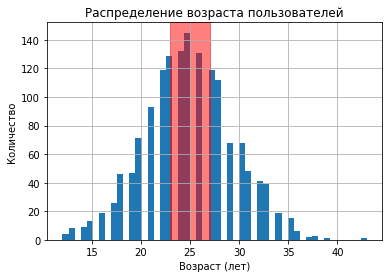

In [23]:
plt.hist(users_go['age'], bins=50)
plt.axvspan(23, 27, color='red', alpha=0.5)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [24]:
print('Среднее значение возраста пользователей', users_go['age'].mean().round(1))
users_go['age'].describe()

Среднее значение возраста пользователей 24.9


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

- The most frequent clients are people aged 19 to 33
- The average age of users is 25

3.2 Frequency of occurrence of cities

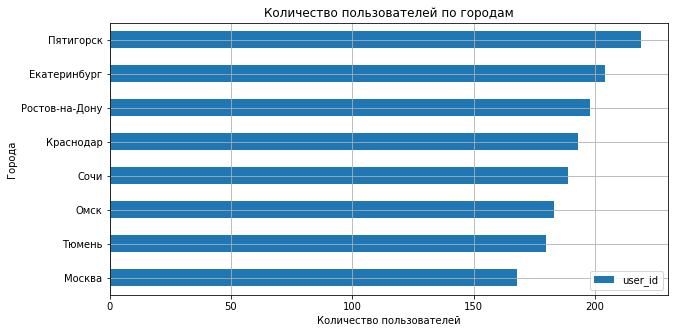

In [25]:
(
    users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
    .plot(kind='barh', grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей')

plt.show()

In [26]:
print('Количество пользователей по городам ') 
users_go.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

Количество пользователей по городам 


,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


3.3 Distribution of trip lengths

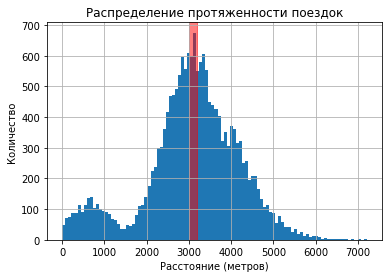

In [27]:
plt.hist(riders_go['distance'], bins=100)
plt.axvspan(3000, 3200, color='red', alpha=0.5)
plt.title('Распределение протяженности поездок')
plt.xlabel('Расстояние (метров)')
plt.ylabel('Количество')
plt.grid(True) 
plt.show()

In [28]:
print('Среднее расстояние (метры)', riders_go['distance'].mean().round(1))
riders_go['distance'].describe()

Среднее расстояние (метры) 3070.7


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

The resulting graph shows two peaks:

up to 1 km. Probably, the scooter was rented to get to some nearby object, or the scooter was discharged/got into a zone where the scooter's movement is blocked.

The most common trips were 2-5 km long.

The average trip length is 3 km.

3.4 Duration of trips

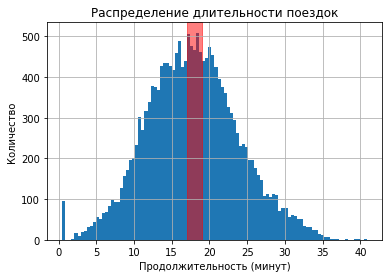

In [29]:
plt.hist(riders_go['duration'], bins=100)
plt.title('Распределение длительности поездок')
plt.axvspan(17, 19, color='red', alpha=0.5)
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

In [30]:
print('Средняя продолжительность (минуты)', riders_go['duration'].mean().round(1))
riders_go['duration'].describe()

Средняя продолжительность (минуты) 17.8


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

The trip duration graph, like the length graph, shows a peak with small values. It can be explained by the same reasons.

The trip generally lasts 8-28 minutes.
The average trip duration is 18 minutes.

3.5 Ratio of subscribed and unsubscribed users

Число пользователей без подписки: 835
Число пользователей с подпиской: 699


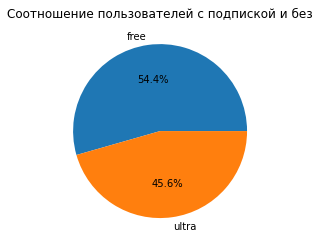

In [31]:
#Посмотрим соотношение пользователей с подпиской (ultra) и без (free)

ultra_count = (users_go['subscription_type'] == 'ultra').sum()
free_count = (users_go['subscription_type'] == 'free').sum()
print('Число пользователей без подписки:', free_count)
print('Число пользователей с подпиской:', ultra_count)

vals = [835, 699]
labels = ["free", "ultra"]
plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Соотношение пользователей с подпиской и без")
plt.show()

**Conclusions:**

- The main users are people from 19 to 33 years old

- The distribution of users by cities is +- the same:

- The top 3 cities by the number of users: Pyatigorsk, Yekaterinburg, Rostov-on-Don.
- The smallest number of users is in Moscow.
- Users with a free tariff predominate (54%)
- Length of trips:

up to 1 km. They probably rented a scooter to get to some nearby object, or the scooter ran out of battery/got into an area where the scooter's movement is blocked.

The most common trips were 2-5 km long.

#### Chapter 4. Combining Data

4.1 Let's combine all three tables into one

In [32]:
data1 = users_go.merge(riders_go)
data = data1.merge(subscriptions_go)

# применяет функцию np.ceil() к столбцу duration таблицы data, 
# округляя все значения до ближайшего большего целого числа.

data['duration'] = np.ceil(data['duration']) 

# display(data) выводит таблицу data в удобочитаемом формате
display(data)

# выводит количество непустых значений в каждом столбце таблицы riders_go
print(riders_go.count())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


user_id     18068
distance    18068
duration    18068
date        18068
month       18068
dtype: int64


In [33]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

4.2 Let's create two more dataframes from the dataframe created in step 4.1  
4.2.1 with data about users without a subscription

In [34]:
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


4.2.2 with data about users with a subscription

In [35]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [36]:
if len(data) == (len(data_free) + len(data_ultra)):
    print('Разделение успешно')
else:
    print('ВНИМАНИЕ проверь код')

Разделение успешно


4.3 Let's look at the distance and time of trips, as well as their age, for users of both categories.

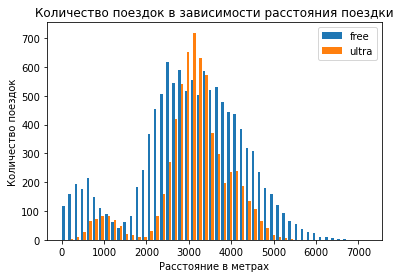

In [37]:
plt.hist([data_free['distance'], data_ultra['distance']], bins=50, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

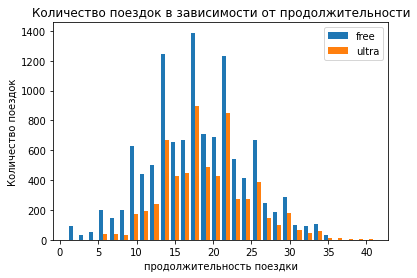

In [38]:
plt.hist([data_free['duration'], data_ultra['duration']], bins=30, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

In [39]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [40]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [41]:
data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [42]:
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [43]:
data_free['age'].describe()

count    11568.000000
mean        24.893326
std          4.481100
min         12.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         43.000000
Name: age, dtype: float64

In [44]:
data_ultra['age'].describe()

count    6500.000000
mean       24.892615
std         4.757208
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        38.000000
Name: age, dtype: float64

**4.5 Conclusion on combining and visualizing data of users without a free subscription and with an ultra subscription**

Visualization of the created datasets of the dependence of the number of trips over a certain distance and descriptive statistics for users without a "free" subscription and with an "ultra" subscription indicates that the subscription affects:
- *average and median values* of trip distance:
- median value:
(without a subscription 3114 meters, with a subscription 3148 meters);
- average value:
(without a subscription 3045 meters, with a subscription 3115 meters).

- *average and median values* of trip time:
- median value:
(without a subscription 18 min, with a subscription 19 min);
- average value:
(without a subscription 17 min, with a subscription 19 min).

The subscription somewhat affects the distance of trips and the travel time.

#### Chapter 5. Revenue Calculation

5.1 Let's create a dataframe with aggregated trip data based on the dataframe with merged data from step 4 and find:
- total distance;
- number of trips;
- total time for each user for each month.

In [45]:
# Создание сводной таблицы:
# index=('user_id', 'month'): группировка по user_id и month.
#values=...: перечислены столбцы, которые будут агрегированы.
#aggfunc=...: определяет функции агрегации для каждого столбца:

    #для distance: count и sum — подсчитывает количество поездок и суммирует расстояния.
    #для duration: sum — суммирует продолжительность поездок.
    #для minute_price, start_ride_price и subscription_fee: mean — вычисляет средние значения.
    
users_months_income = data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price',
        'subscription_fee',
        'subscription_type'
    ), 
    aggfunc=({
        'distance': {'count', 'sum'}, 
        'duration': 'sum',
        'minute_price': 'mean',
        'start_ride_price': 'mean',
        'subscription_fee': 'mean',
        'subscription_type': 'first'
    })
)

In [46]:
#Переименование столбцов

users_months_income.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee',
    'subscription_type'
]

In [47]:
users_months_income.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

5.2 Let's add a column to the dataframe with the monthly revenue generated by each user.

In [48]:
users_months_income['revenue'] = (
users_months_income['start_ride_price']*users_months_income['count']+
users_months_income['minute_price']*users_months_income['duration']+
users_months_income['subscription_fee'])

print ('Выручка за 2021 год составила :',users_months_income['revenue'].sum(), 'руб.')

Выручка за 2021 год составила : 3878641.0 руб.


The revenue of the scooter rental service "GoFast" for the year amounted to 3,878,641.0 rubles.

#### Chapter 6. Hypothesis Testing

6.1 Let's check whether users with a subscription spend more time on trips.
If so, then users with a subscription may be "more profitable" for the company.

- Null hypothesis (H0): The average duration of trips with an ultra subscription and without (free) is equal to
- Alternative hypothesis (H1): The average duration of trips with an ultra subscription is longer than the duration of trips without subscriptions (free).

In [49]:
ultra = data_ultra['duration'] 

free = data_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


The null hypothesis is rejected, we can conclude that the average duration of a trip with a subscription is longer than the duration of trips without a subscription.

6.2 The optimal distance in terms of scooter wear and tear and the average distance that users with a subscription travel in one trip does not exceed 3,130 meters.

- Null hypothesis (H0): The average trip distance with the ultra subscription is equal to the optimal distance of 3130 meters.
- Alternative hypothesis (H1): The average trip distance with the ultra subscription is greater than the optimal distance of 3130 meters.

In [50]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


The null hypothesis was not rejected and therefore there is reason to believe that the average travel distance of users with a subscription does not exceed the optimal distance of 3130 meters in terms of scooter wear.

6.3. Let's test the hypothesis of whether monthly revenue from users with a monthly subscription will be higher than revenue from users without a subscription.

- Null hypothesis (H0): Monthly revenue from users with a subscription is equal to monthly revenue from users without a subscription.
- Alternative hypothesis (H1): Monthly revenue from users with a subscription is greater than monthly revenue from users without a subscription.

In [51]:
# Проведение t-теста для двух независимых выборок:

results = st.ttest_ind(
    users_months_income.loc[users_months_income['subscription_fee'] > 0, 'revenue'], 
    users_months_income.loc[users_months_income['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')

#Вывод значения p-value:
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


We tested the hypothesis and can say that revenue from users with an ultra subscription exceeds revenue from users without a subscription.

6.4 Let's look at the situation: the service's technical team updated the servers with which the mobile application interacts. They hope that because of this, the number of requests to technical support has significantly decreased.
A certain file contains data for each user on the number of requests before and after the update. What test would you need to verify this hypothesis?

To test the hypothesis that the number of support requests has significantly decreased after the server upgrade, a **paired t-test** is required. This test compares the means of two related samples (before and after the upgrade) for the same user.

A paired t-test is used because the data on the number of requests before and after the server upgrade belong to the same users. It takes into account the dependence between the samples and evaluates whether there is a statistically significant difference between the means of the two related groups.

Example code for performing a paired t-test using the scipy.stats library:


```python

from scipy import stats

# Предположим, что у вас есть данные в виде двух массивов или серий pandas:
# before_updates и after_updates - это количество обращений до и после обновления соответственно.

before_updates = [количество обращений до обновления для каждого пользователя]
after_updates = [количество обращений после обновления для каждого пользователя]

# Проведение парного t-теста
results = stats.ttest_rel(before_updates, after_updates, alternative='less')

# Вывод значения p-value
print('p-value:', results.pvalue)

# Уровень значимости
alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: количество обращений в техподдержку снизилось.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: нет значимого снижения количества обращений в техподдержку.')
```

**General conclusion**

**1. Loaded data**

Studied tables:

users_go - this table contains 1565 records, no gaps, 31 obvious duplicates.

users_go - this table contains 18068 records, no gaps, no obvious duplicates.

subscriptions_go - this table contains 2 records, no gaps, no obvious duplicates.

Column names are normal.

Data is considered complete and sufficient for research.

**2. Pre-processed data**

In users_go data - deleted detected duplicates;
converted date column in riders_go table to date type;
created month column with month number from date;
did not make any changes in subscriptions_go data.

**3. Conducted an exploratory analysis of the data**

It was found that the scooter rental service is used most in Pyatigorsk, Yekaterinburg, Rostov-on-Don. And the smallest number of users is in Moscow.

The number of users without a subscription (free) 54.4% exceeds the number of users with a subscription (ultra) 45.6%.

The main users are people from 19 to 33 years old

**4. Combined the data**

At this stage, we found that the most frequent trips were 2-5 km long.

We found a surge in trips up to 1 km long. Probably, they rented a scooter to get to some nearby object, or the scooter ran out of battery / got into an area where the scooter's movement is blocked.

It was found that the subscription affects the average and median values ​​​​of the trip distance:

median value:
(without a subscription 3114 meters, with a subscription 3148 meters);
average value: (without subscription 3045 meters, with subscription 3115 meters).
on average and median travel time values:

median value: (without subscription 18 min, with subscription 19 min);
average value: (without subscription 17 min, with subscription 19 min).

That is, the subscription affects the distance of trips and the travel time.

**5. Revenue calculation**

We calculated that the revenue of the scooter rental service "GoFast" for the year was 3,878,641.0.0 rubles.

**6. Hypothesis testing**

We tested a number of hypotheses, as a result of which there is reason to assume that:
- the average duration of a ride with a subscription is longer than the duration of rides without a subscription;
- monthly revenue from users with an ultra subscription exceeds revenue from users without a subscription.

At the same time, it is likely that users without a subscription "only" bring in more revenue, because there are more of them.

**Thus, based on the fact that monthly revenue from users with an ultra subscription exceeds revenue from users without a subscription, the marketing and sales departments should focus on attracting customers so that they also use a subscription when renting scooters.**

